In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics Functions

In [3]:
# help('scipy')

In [4]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
print ("Size of train data : {}".format(train.shape))
print ("Size of test data : {}".format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


**Drop the Id column because we dont need it currently.**

In [7]:
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

In [8]:
print ("Size of train data : {}".format(train.shape))
print ("Size of test data : {}".format(test.shape))

Size of train data : (1460, 80)
Size of test data : (1459, 79)


### *Dealing with outliers*
#### *Outlinear in the GrLivArea is recommended by the author of the data to remove it. The author says in documentation “I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.”*

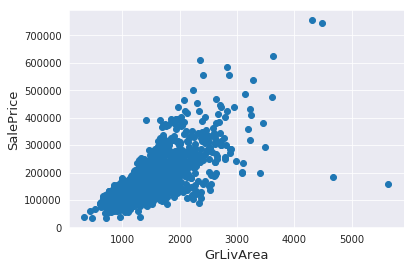

In [9]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [10]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

### Correlation Analysis
#### Let see the most correlated features.

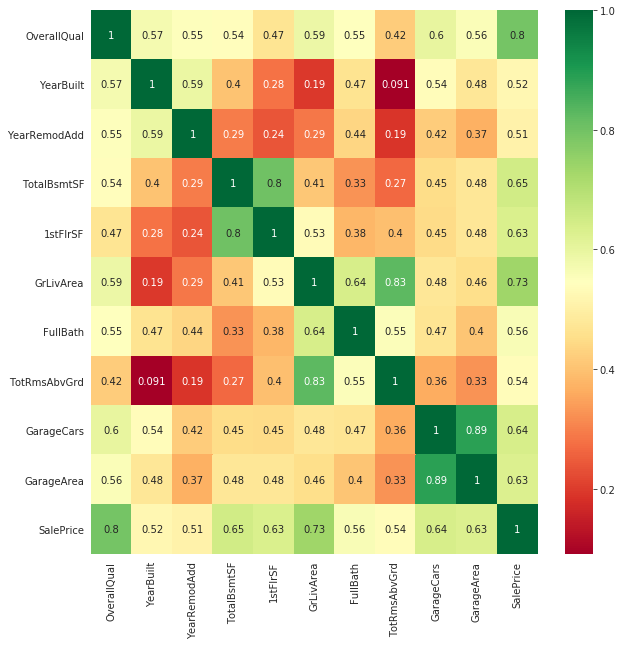

In [11]:
# most correlated features r > 0.5
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap='RdYlGn')


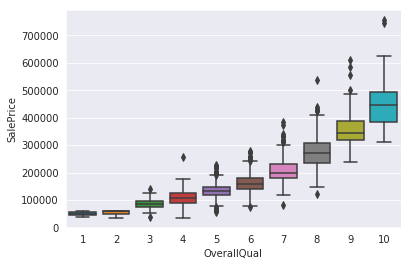

In [12]:
sns.boxplot(train.OverallQual, train.SalePrice)

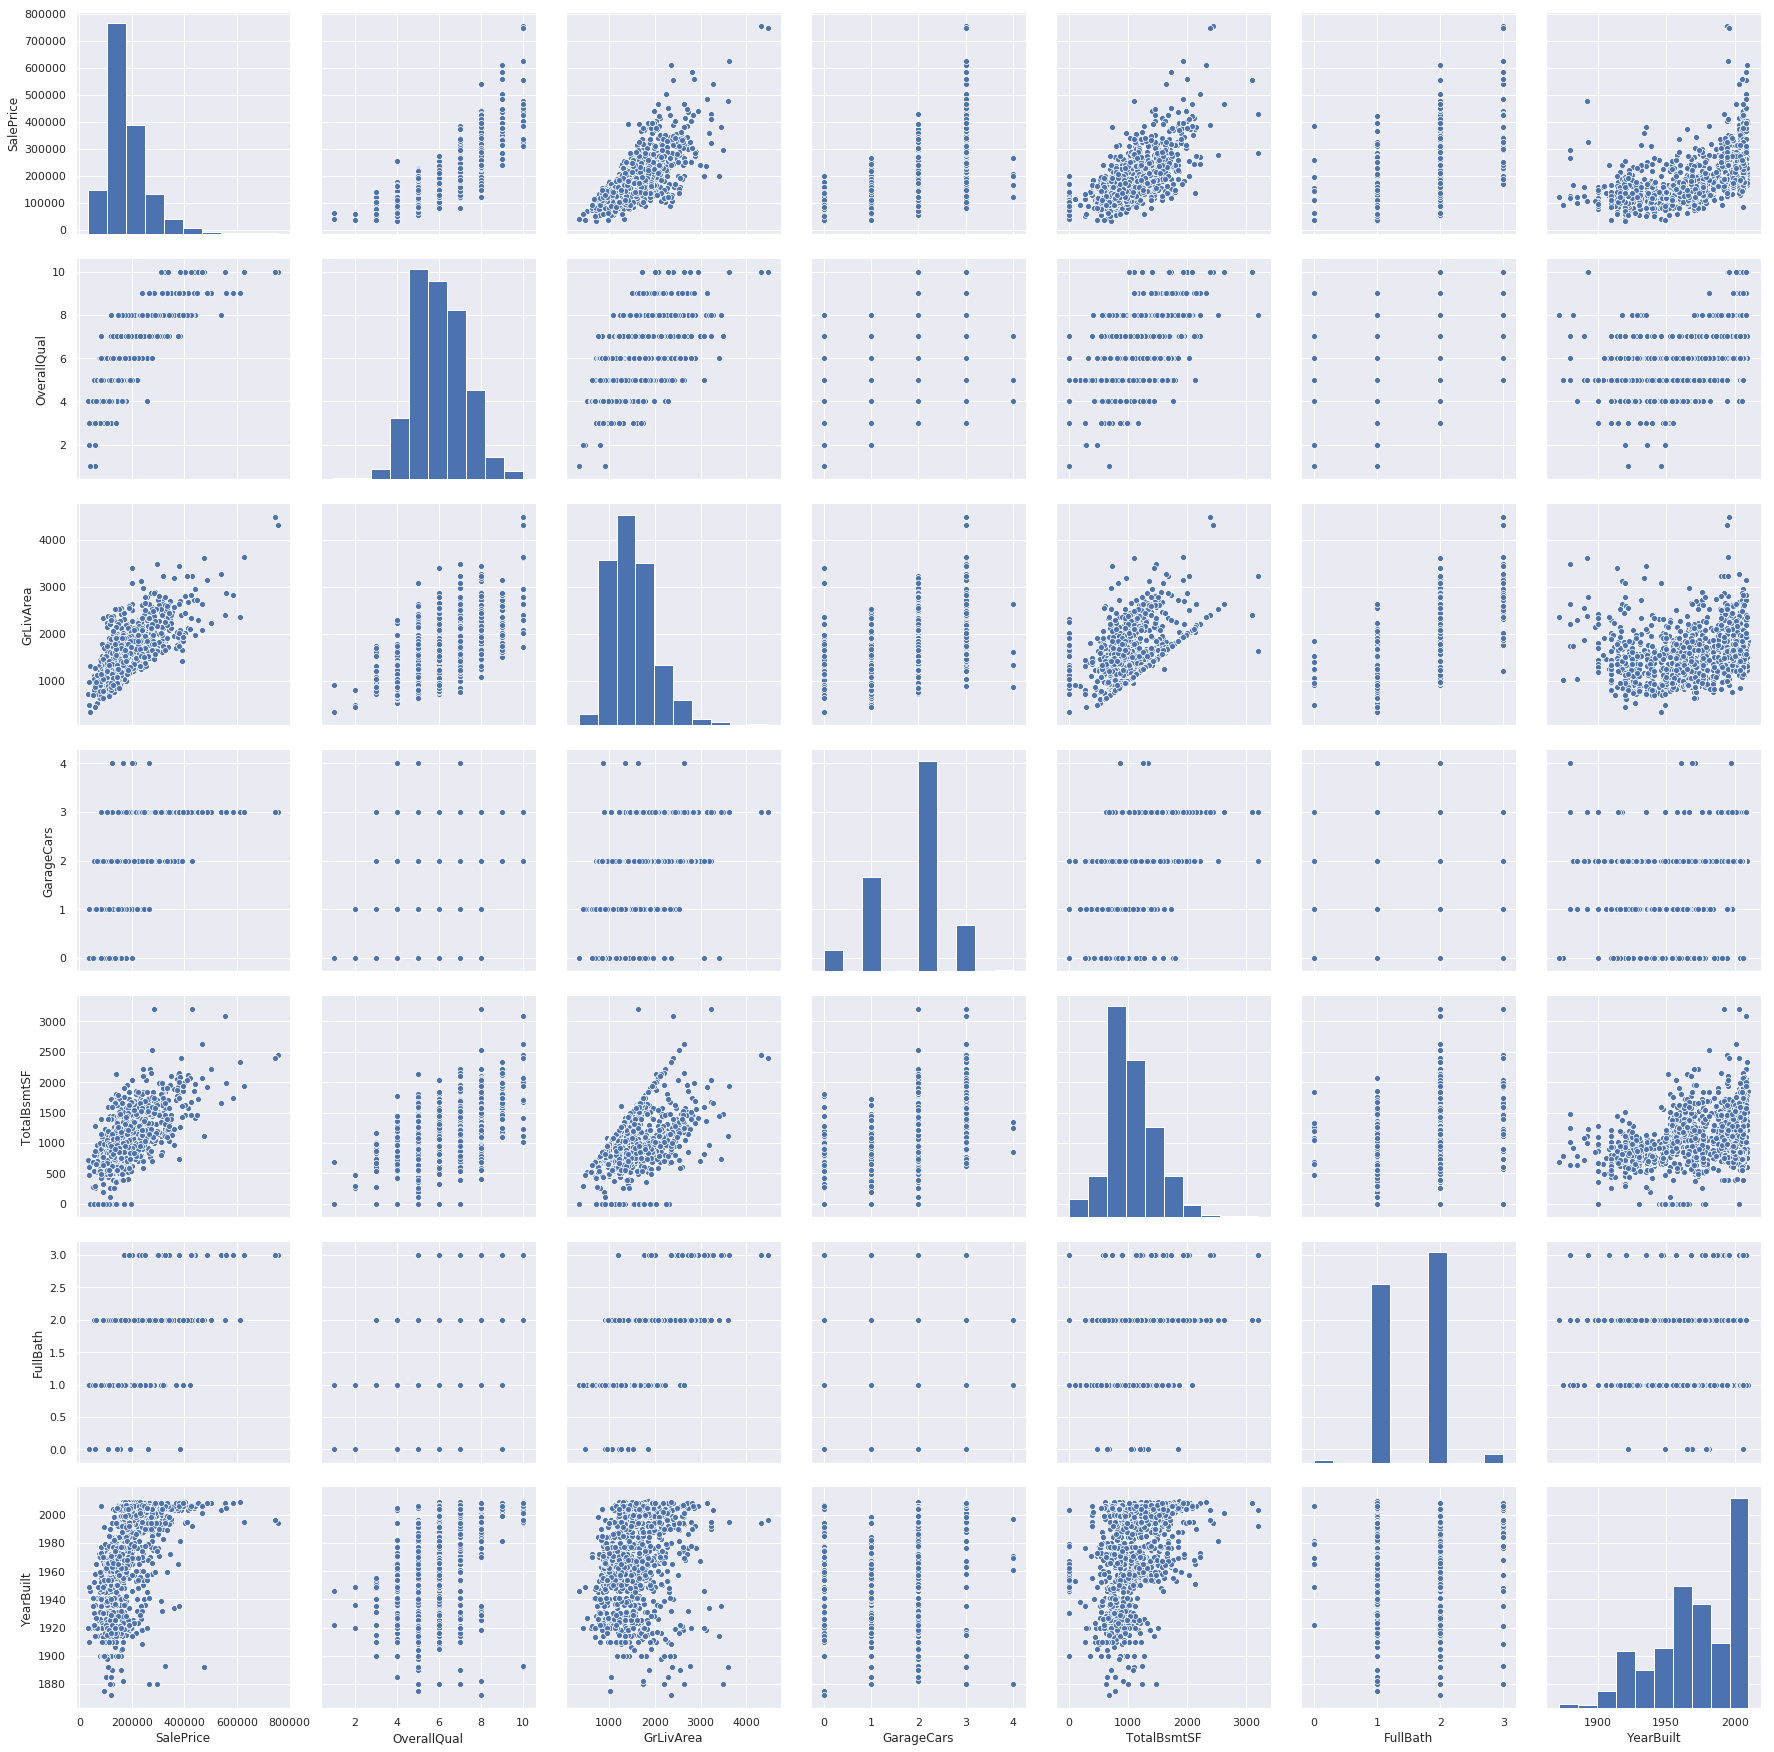

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 3.5)
plt.show();

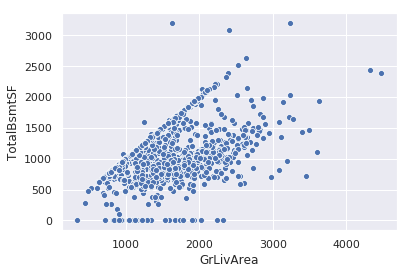

In [14]:
sns.scatterplot(train.GrLivArea, train.TotalBsmtSF)

### *Target Variable Transform*
#### Different features in the data set may have values in different ranges. For example, in this data set, the range of SalePrice feature may lie from thousands to lakhs but the range of values of YearBlt feature will be in thousands. That means a column is more weighted compared to other.

**Lets check the skewness of data**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180932.92 and sigma = 79467.79



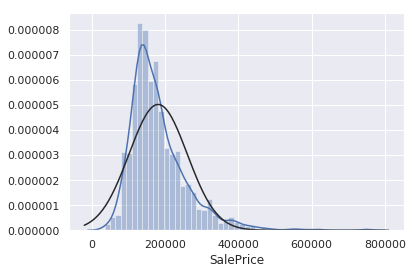

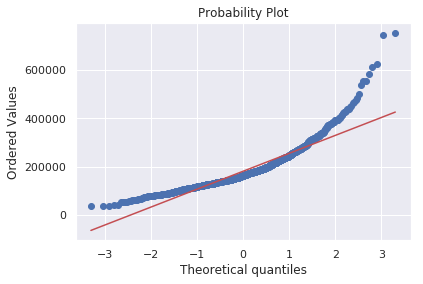

In [15]:
def check_skewness(col):
    sns.distplot(train[col], fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    (mu, sigma) = norm.fit(train[col])
    print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness('SalePrice')

#### This distribution is positively skewed.* Notice that the black curve is more deviated towards the right. If you encounter that your predictive (response) variable is skewed, it is *recommended to fix the skewness* to make good decisions by the model.*

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 12.02 and sigma = 0.40



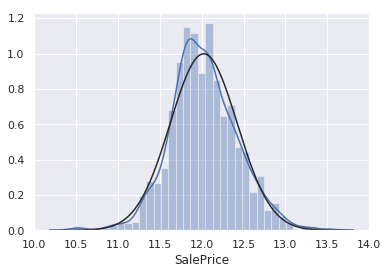

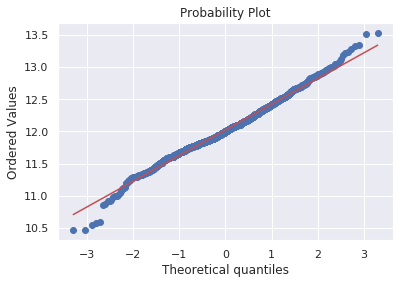

In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
#train["SalePrice"].describe()

check_skewness('SalePrice')

#### Important : If you log transform the response variable, it is required to also log transform feature variables that are skewed.


## Feature Engineering

### Missing values

In [17]:
# first concate the train and test data in the same dataframe
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)


#all_data = pd.concat((train.drop(['SalePrice'], axis=1), test))


There are 34 features contain missing values.


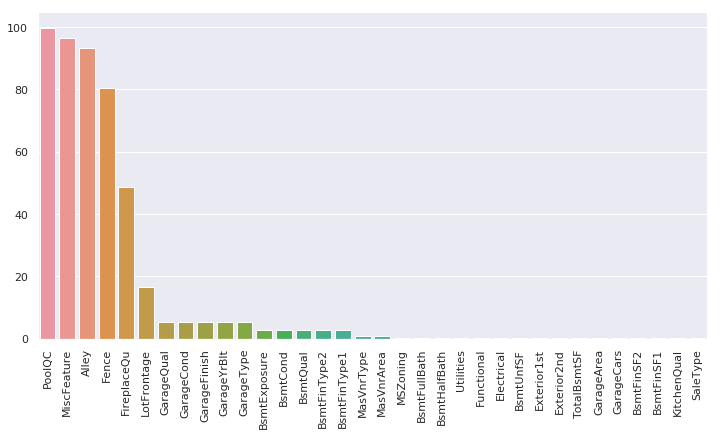

In [18]:

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(x=all_data_na.index, y=all_data_na)
num_missCol = len(all_data_na)
print('There are {} features contain missing values.'.format(num_missCol)) 


### Imputing missing values¶

We impute them by proceeding sequentially through features with missing values

- **PoolQC** : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [19]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

- **MiscFeature** : data description says NA means "no misc feature"

In [20]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("Nona")

- **Alley** : data description says NA means "no alley access"

In [21]:
all_data['Alley'] = all_data['Alley'].fillna('None')

- **Fence** : data description says NA means "no fence"


In [22]:
all_data["Fence"] = all_data["Fence"].fillna("None")


- **FireplaceQu** : data description says NA means "no fireplace"


In [23]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


- **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can **fill in missing values by the median LotFrontage of the neighborhood.**

In [24]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

In [25]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

- **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [26]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [27]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.


In [28]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

- MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [29]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna('None')
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'


In [30]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

- **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, **this feature won't help in predictive modelling**. We can then safely remove it.


In [31]:
all_data = all_data.drop(['Utilities'], axis=1)

- **Functional** : data description says NA means typical


In [32]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


In [33]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.


In [34]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string


In [35]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

- **SaleType** : Fill in again with most frequent which is "WD"


In [36]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None


In [37]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### Is there any remaining missing value ?

In [38]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
num_missCol = len(all_data_na)
print('There are {} features contain missing values.'.format(num_missCol)) 

There are 0 features contain missing values.


### More features engeneering

#### Converting some numerical variables that are really categorical type.



In [39]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

**Label Encoding some categorical variables that may contain information in their ordering set**

#### *And to convert this kind of categorical text data into model-understandable numerical data, we use the Label Encoder class.*

#### *Suppose, we have a feature State which has 3 category i.e India , France, China . So, Label Encoder will categorize them as 0, 1, 2.*


In [40]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# apply LabelEncoder to each categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
    
# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [41]:
### add one more featrue: total area of basement,first and second floor areas of each house
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [42]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,2,6,1.0,0.0,2,150.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,3,0,PConc,2,6,548.0,2.0,5,2,5,Attchd,2003.0,1710,1,GasA,0,2Story,1,2,Lvl,0,8450,Inside,65.0,3,0,10,RL,196.0,BrkFace,Nona,0,4,CollgCr,61,4,7,2,0,3,CompShg,Gable,Normal,WD,0,1,8,856.0,0,2003,2003,2,2566.0
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,0,6,0.0,1.0,2,284.0,1,Feedr,Norm,SBrkr,0,4,3,MetalSd,MetalSd,4,5,1,CBlock,2,6,460.0,2.0,5,2,5,Attchd,1976.0,1262,0,GasA,0,1Story,1,3,Lvl,0,9600,FR2,80.0,3,0,5,RL,0.0,None,Nona,0,7,Veenker,0,7,6,2,0,3,CompShg,Gable,Normal,WD,0,1,6,1262.0,298,1976,1976,1,2524.0
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,2,6,1.0,0.0,2,434.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,5,1,PConc,2,6,608.0,2.0,5,2,5,Attchd,2001.0,1786,1,GasA,0,2Story,1,2,Lvl,0,11250,Inside,68.0,0,0,10,RL,162.0,BrkFace,Nona,0,11,CollgCr,42,4,7,2,0,3,CompShg,Gable,Normal,WD,0,1,6,920.0,0,2001,2002,2,2706.0
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,0,6,1.0,0.0,4,540.0,1,Norm,Norm,SBrkr,272,4,3,Wd Sdng,Wd Shng,4,2,1,BrkTil,1,6,642.0,3.0,5,3,5,Detchd,1998.0,1717,0,GasA,2,2Story,1,2,Lvl,0,9550,Corner,60.0,0,0,11,RL,0.0,None,Nona,0,4,Crawfor,35,4,7,2,0,3,CompShg,Gable,Abnorml,WD,0,1,7,756.0,0,1915,1970,0,2473.0
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,2,6,1.0,0.0,2,490.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,5,1,PConc,2,6,836.0,3.0,5,2,5,Attchd,2000.0,2198,1,GasA,0,2Story,1,2,Lvl,0,14260,FR2,84.0,0,0,10,RL,350.0,BrkFace,Nona,0,3,NoRidge,84,4,8,2,0,3,CompShg,Gable,Normal,WD,0,1,9,1145.0,192,2000,2000,2,3343.0


#### Since we fix the skewness to the respones variable, we should fix the skewness for some high skewness features.

#### Lets see the highly skewed features we have

In [43]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

# check the skew
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(
    ascending=False)
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


#### Box Cox Transformation of (highly) skewed features

In [44]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feats in skewed_features:
    #all_data[feat] += 1
    all_data[feats] = boxcox1p(all_data[feats], lam)


There are 59 skewed numerical features to Box Cox transform


In [45]:
# after box-cox transformation
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,11.692623,11.686189,0.0,0.730463,1.540963,1Fam,1.820334,1.540963,11.170327,0.0,1.194318,2.259674,0.730463,0.000000,1.194318,7.483296,0.730463,Norm,Norm,SBrkr,0.000000,1.820334,1.194318,VinylSd,VinylSd,1.820334,1.540963,0.000000,PConc,1.194318,2.259674,10.506271,1.194318,2.055642,1.194318,2.055642,Attchd,14.187527,13.698888,0.730463,GasA,0.000000,2Story,0.730463,1.194318,Lvl,0.0,19.212182,Inside,5.831328,1.540963,0.0,2.885846,RL,8.059126,BrkFace,Nona,0.0,1.820334,CollgCr,5.714669,1.820334,2.440268,1.194318,0.0,1.540963,CompShg,Gable,Normal,WD,0.0,0.730463,2.602594,11.692623,0.000000,14.187527,14.187527,1.194318,14.976591
1,12.792276,0.000000,0.0,0.730463,1.540963,1Fam,1.820334,0.730463,12.062832,0.0,0.000000,2.259674,0.000000,0.730463,1.194318,8.897844,0.730463,Feedr,Norm,SBrkr,0.000000,1.820334,1.540963,MetalSd,MetalSd,1.820334,2.055642,0.730463,CBlock,1.194318,2.259674,10.062098,1.194318,2.055642,1.194318,2.055642,Attchd,14.145138,12.792276,0.000000,GasA,0.000000,1Story,0.730463,1.540963,Lvl,0.0,19.712205,FR2,6.221214,1.540963,0.0,2.055642,RL,0.000000,None,Nona,0.0,2.440268,Veenker,0.000000,2.440268,2.259674,1.194318,0.0,1.540963,CompShg,Gable,Normal,WD,0.0,0.730463,2.259674,12.792276,9.010206,14.145138,14.145138,0.730463,14.923100
2,11.892039,11.724598,0.0,0.730463,1.540963,1Fam,1.820334,1.194318,10.200343,0.0,1.194318,2.259674,0.730463,0.000000,1.194318,9.917060,0.730463,Norm,Norm,SBrkr,0.000000,1.820334,1.194318,VinylSd,VinylSd,1.820334,2.055642,0.730463,PConc,1.194318,2.259674,10.775536,1.194318,2.055642,1.194318,2.055642,Attchd,14.184404,13.832085,0.730463,GasA,0.000000,2Story,0.730463,1.194318,Lvl,0.0,20.347241,Inside,5.914940,0.000000,0.0,2.885846,RL,7.646538,BrkFace,Nona,0.0,3.011340,CollgCr,5.053371,1.820334,2.440268,1.194318,0.0,1.540963,CompShg,Gable,Normal,WD,0.0,0.730463,2.259674,11.892039,0.000000,14.184404,14.185966,1.194318,15.149678
3,12.013683,11.354094,0.0,0.730463,1.540963,1Fam,0.730463,1.540963,8.274266,0.0,0.000000,2.259674,0.730463,0.000000,1.820334,10.468500,0.730463,Norm,Norm,SBrkr,8.797736,1.820334,1.540963,Wd Sdng,Wd Shng,1.820334,1.194318,0.730463,BrkTil,0.730463,2.259674,10.918253,1.540963,2.055642,1.540963,2.055642,Detchd,14.179714,13.711364,0.000000,GasA,1.194318,2Story,0.730463,1.194318,Lvl,0.0,19.691553,Corner,5.684507,0.000000,0.0,3.011340,RL,0.000000,None,Nona,0.0,1.820334,Crawfor,4.745132,1.820334,2.440268,1.194318,0.0,1.540963,CompShg,Gable,Abnorml,WD,0.0,0.730463,2.440268,11.354094,0.000000,14.047529,14.135652,0.000000,14.857121
4,12.510588,12.271365,0.0,0.730463,1.820334,1Fam,1.820334,0.000000,10.971129,0.0,1.194318,2.259674,0.730463,0.000000,1.194318,10.221051,0.730463,Norm,Norm,SBrkr,0.000000,1.820334,1.194318,VinylSd,VinylSd,1.820334,2.055642,0.730463,PConc,1.194318,2.259674,11.627708,1.540963,2.055642,1.194318,2.055642,Attchd,14.182841,14.480029,0.730463,GasA,0.000000,2Story,0.730463,1.194318,Lvl,0.0,21.325160,FR2,6.314735,0.000000,0.0,2.885846,RL,9.391827,BrkFace,Nona,0.0,1.540963,NoRidge,6.314735,1.820334,2.602594,1.194318,0.0,1.540963,CompShg,Gable,Normal,WD,0.0,0.730463,2.750250,12.510588,8.013884,14.182841,14.182841,1.194318,15.852312


#### Getting dummy categorical features

In [46]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 220)

In [47]:
# after getting dummy
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,...,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.0,1.194318,2.259674,0.730463,0.000000,1.194318,7.483296,0.730463,0.000000,1.820334,1.194318,1.820334,1.540963,0.000000,1.194318,2.259674,10.506271,1.194318,2.055642,1.194318,2.055642,14.187527,13.698888,0.730463,0.000000,0.730463,1.194318,0.0,19.212182,5.831328,1.540963,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.0,0.000000,2.259674,0.000000,0.730463,1.194318,8.897844,0.730463,0.000000,1.820334,1.540963,1.820334,2.055642,0.730463,1.194318,2.259674,10.062098,1.194318,2.055642,1.194318,2.055642,14.145138,12.792276,0.000000,0.000000,0.730463,1.540963,0.0,19.712205,6.221214,1.540963,0.0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.0,1.194318,2.259674,0.730463,0.000000,1.194318,9.917060,0.730463,0.000000,1.820334,1.194318,1.820334,2.055642,0.730463,1.194318,2.259674,10.775536,1.194318,2.055642,1.194318,2.055642,14.184404,13.832085,0.730463,0.000000,0.730463,1.194318,0.0,20.347241,5.914940,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.0,0.000000,2.259674,0.730463,0.000000,1.820334,10.468500,0.730463,8.797736,1.820334,1.540963,1.820334,1.194318,0.730463,0.730463,2.259674,10.918253,1.540963,2.055642,1.540963,2.055642,14.179714,13.711364,0.000000,1.194318,0.730463,1.194318,0.0,19.691553,5.684507,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.0,1.194318,2.259674,0.730463,0.000000,1.194318,10.221051,0.730463,0.000000,1.820334,1.194318,1.820334,2.055642,0.730463,1.194318,2.259674,11.627708,1.540963,2.055642,1.194318,2.055642,14.182841,14.480029,0.730463,0.000000,0.730463,1.194318,0.0,21.325160,6.314735,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


#### Creating train and test data.

In [48]:
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape

(1458, 220)

### Lets apply Modelling
1. we will use models
    * Lasso
    * Ridge
    * ElasticNet
    * Gradient Boosting
2. Find the Cross Validation Score
3. Calculate the mean of all model's prediction
4. Submit the CSV file

In [49]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### Cross Validation
**KFold()** splits the train/test data into k consecutive folds, we also have made shuffle attrib to True.

**cross_val_score()** evaluate a score by cross-validation.

In [50]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, 
                                    scoring="neg_mean_squared_error",
                                   cv = kf))
    return(rmse)

### Modelling
To avoid Overfitting and noisy we will use Regularization. And Regularization will reduce the magnitude of the coefficients.

In [51]:
# Ridge Regression
# using L2 regularization technique
KRR = KernelRidge(alpha=0.6, kernel='polynomial',degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [52]:
# Lasso Regression
# using L1 regularization technique

lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1115 (0.0074)



In [53]:
# Elastic Net Regression
# Elastic net is basically a combination of both L1 and L2 regularization. 

ENet = make_pipeline(RobustScaler(), ElasticNet(
alpha=0.0005, l1_ratio=0.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.1116 (0.0074)



In [54]:
# Gradient Boosting Regression

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                  max_depth=4, max_features='sqrt', min_samples_leaf
                                  =15, min_samples_split=10, loss='huber',
                                  random_state=5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".
     format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0080)



In [55]:
#Fit the training dataset on every model
LassoMd = lasso.fit(train.values, y_train)
ENetMd = ENet.fit(train.values,y_train)
KRRMd = KRR.fit(train.values,y_train)
GBoostMd = GBoost.fit(train.values,y_train)

### Mean of all model's prediction
* np.expm1 ( ) is used to calculate exp(x) - 1 for all elements in the array.

In [56]:
finalMd = (np.expm1(LassoMd.predict(test.values))+
          np.expm1(ENetMd.predict(test.values))+
          np.expm1(KRRMd.predict(test.values))+
          np.expm1(GBoostMd.predict(test.values)))/4

finalMd

array([120177.72631583, 163816.9147683 , 183417.48473384, ...,
       171142.03348031, 114284.70143213, 222131.78687056])

### Submission

In [57]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = finalMd
sub.to_csv('submission.csv', index=False)